In [1]:
import pickle
import pandas as pd
import seaborn as sns
import urllib.request
import IPython.display as ipd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
# placeholder cell for imports that need to be added


In [5]:
with open('../data/Zoukables.pkl', 'rb') as pkl:
    playlist = pickle.load(pkl)
playlist['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [6]:
tracks = playlist['tracks']['items']
print(tracks[0].keys())

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])


In [8]:
track = tracks[0]['track']
print('artist:        ' + track['artists'][0]['name'])
print('title:         ' + track['name'])
print('duration:      ' + str(int(track['duration_ms']/1000)))
print('album:         ' + track['album']['name'])
print('track:         ' + str(track['track_number']))
print('release_date:  ' + track['album']['release_date'])
print('cover_art_url: ' + track['album']['images'][0]['url'])
print('preview_mp3:   ' + track['preview_url'])
print('is_explicit:   ' + str(track['explicit']))
print('isrc_number:   ' + track['external_ids']['isrc'])
print('spotify_id:    ' + track['id'])


artist:        Camila Cabello
title:         Crying in the Club
duration:      216
album:         Crying in the Club
track:         1
release_date:  2017-05-18
cover_art_url: https://i.scdn.co/image/33b8b2289d5b441a250656414f86d0758abac098
preview_mp3:   https://p.scdn.co/mp3-preview/1a9f4cc9835fdf339761f898464a34bd9c51b638?cid=00af9e699c7a40bdb84e5739bc38e2cf
is_explicit:   False
isrc_number:   USSM11704592
spotify_id:    1SJtlNRJDeYHioymcvsqev


In [9]:
def get_tags(track):
    tags = {}
    tags['artist'] = track['artists'][0]['name']
    tags['title'] = track['name']
    tags['duration'] = int(track['duration_ms']/1000)
    tags['album'] = track['album']['name']
    tags['track'] = track['track_number']
    tags['release_date'] = track['album']['release_date']
    tags['cover_art_url'] = track['album']['images'][0]['url']
    tags['preview_mp3'] = track['preview_url']
    tags['is_explicit'] = track['explicit']
    tags['isrc_number'] = track['external_ids']['isrc']
    tags['spotify_id'] = track['id']
    return tags

all_data = []
for track in tracks:
    all_data.append(get_tags(track['track']))

In [10]:
len(all_data)

100

In [14]:
data = pd.DataFrame(all_data)
print(data.shape)

(100, 11)


In [30]:
## DON'T RUN THIS YET! 

# ZOUKABLES.PKL CONTAINS 100 TRACKS
# ZOUKABLES.CSV CONTAINS 350+ TRACKS

# NEED TO RE-DOWNLOAD ZOUKABLES 0, 1, 2, 3
# AND THEN CONCATENATE INTO A SINGLE PKL FILE

#data.to_csv('Zoukables.csv', sep='\t')

In [16]:
# THIS BREAKS TOO... NEED TO INVESTIGATE
#playlist['next']

In [17]:
def print_playlist_name_and_length(playlist, n):
    title = playlist['name']
    n_tracks = playlist['tracks']['total']
    print(f'{n}. {title} : {n_tracks} tracks')


def get_playlist_metadata(sp_user_playlist):
    metadata = []
    tracks = sp_user_playlist['tracks']
    metadata.append(tracks['items'])
    while tracks['next']:
        tracks = sp.next(tracks)
        metadata.append(tracks['items'])
    return metadata


## Spotify Audio Features
Let's take a look at the audio features that Spotify gives us for Camila Cabelo's song Crying In The Club.

In [27]:
with open('../data/Crying_Features.pkl', 'rb') as pkl:
    features = pickle.load(pkl)

features[0]

{'danceability': 0.334,
 'energy': 0.617,
 'key': 6,
 'loudness': -5.834,
 'mode': 0,
 'speechiness': 0.383,
 'acousticness': 0.334,
 'instrumentalness': 0,
 'liveness': 0.163,
 'valence': 0.603,
 'tempo': 85.227,
 'type': 'audio_features',
 'id': '1SJtlNRJDeYHioymcvsqev',
 'uri': 'spotify:track:1SJtlNRJDeYHioymcvsqev',
 'track_href': 'https://api.spotify.com/v1/tracks/1SJtlNRJDeYHioymcvsqev',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1SJtlNRJDeYHioymcvsqev',
 'duration_ms': 216391,
 'time_signature': 4}

# Okay, Let's dig into the playlist data

In [201]:
#zouks = pd.read_csv("../data/Zoukables.csv", sep='\t')
#zouks = zouks.drop(columns='Unnamed: 0')
print(f'{zouks.shape[0]} rows x {zouks.shape[1]} columns')
print()
print(list(zouks.columns))

zouks.index = zouks['artist'] + ' - ' + zouks['title']
zouks.head()

357 rows x 28 columns

['album', 'artist', 'cover_art_url', 'duration', 'id', 'is_explicit', 'isrc_number', 'preview_mp3', 'release_date', 'title', 'track', 'acousticness', 'analysis_url', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'track_href', 'type', 'uri', 'valence']


album            artist  \
Camila Cabello - Crying in the Club    Crying in the Club    Camila Cabello   
Maroon 5 - Don't Wanna Know              Don't Wanna Know          Maroon 5   
Starley - Call on Me                           Call on Me           Starley   
WizKid - Naughty Ride                        Naughty Ride            WizKid   
Dennys The Black - Bien Buena        Las Reglas del Juego  Dennys The Black   

                                                                         cover_art_url  \
Camila Cabello - Crying in the Club  https://i.scdn.co/image/33b8b2289d5b441a250656...   
Maroon 5 - Don't Wanna Know          https://i.scdn.co/image/2952b976bd1616d51c1eab...   
Starley - Call on Me                 https://i.scdn.co/image/445e19f63fc26273ff870a...   
WizKid - Naughty Ride                https://i.scdn.co/image/92ffcd9706e129c0139766...   
Dennys The Black - Bien Buena        https://i.scdn.co/image/09df8011a46ae14bfbedb9...   

                                     duration                      id  \
Camila Cabello - Crying in the Club       216  1SJtlNRJDeYHioymcvsqev   
Maroon 5 - Don't Wanna Know               214  5MFzQMkrl1FOOng9tq6R9r   
Starley - Call on Me                      161  0t47PyJgXmnUAK5obb0mM2   
WizKid - Naughty Ride                     192  1YU8OXFCPP9fVkvnMzum4z   
Dennys The Black - Bien Buena             243  4ZLddAJG3VQgqqcBZYXBjG   

                                     is_explicit   isrc_number  \
Camila Cabello - Crying in the Club        False  USSM11704592   
Maroon 5 - Don't Wanna Know                False  USUM71609975   
Starley - Call on Me                       False  AUCN31208903   
WizKid - Naughty Ride                      False  USRC11700910   
Dennys The Black - Bien Buena               True  usdy41730257   

                                                                           preview_mp3  \
Camila Cabello - Crying in the Club  https://p.scdn.co/mp3-preview/1a9f4cc9835fdf33...   
Maroon 5 - Don't Wanna Know                                                        NaN   
Starley - Call on Me                                                               NaN   
WizKid - Naughty Ride                                                              NaN   
Dennys The Black - Bien Buena                                                      NaN   

                                    release_date               title   ...     \
Camila Cabello - Crying in the Club   2017-05-18  Crying in the Club   ...      
Maroon 5 - Don't Wanna Know           2016-10-11    Don't Wanna Know   ...      
Starley - Call on Me                  2016-07-29          Call on Me   ...      
WizKid - Naughty Ride                 2017-06-23        Naughty Ride   ...      
Dennys The Black - Bien Buena         2017-05-01          Bien Buena   ...      

                                     liveness  loudness mode  speechiness  \
Camila Cabello - Crying in the Club    0.1630    -5.834    0       0.3830   
Maroon 5 - Don't Wanna Know            0.0975    -6.126    1       0.0800   
Starley - Call on Me                   0.0839    -7.109    1       0.0417   
WizKid - Naughty Ride                  0.4200    -7.097    0       0.0575   
Dennys The Black - Bien Buena          0.0614    -3.725    1       0.1570   

                                       tempo  time_signature  \
Camila Cabello - Crying in the Club   85.227               4   
Maroon 5 - Don't Wanna Know          100.048               4   
Starley - Call on Me                  97.998               4   
WizKid - Naughty Ride                 95.051               4   
Dennys The Black - Bien Buena        177.964               4   

                                                                            track_href  \
Camila Cabello - Crying in the Club  https://api.spotify.com/v1/tracks/1SJtlNRJDeYH...   
Maroon 5 - Don't Wanna Know          https://api.spotify.com/v1/tracks/5MFzQMkrl1FO...   
Starley - Call on Me                 https://api.spoti

In [221]:
zouks.tail(20)

album  \
D'banj - Action                                                                                Action   
Ric Hassani - Only You                                                                       Only You   
IDER - Mirror - Honors Remix                                                    Mirror (Honors Remix)   
Brxce - Naughty                                                                               Naughty   
Dee Mad - Along With You                                                               Along With You   
Shekhinah - Suited                                                                          Rose Gold   
The.wav - 4 Seasons                                                                         4 Seasons   
Sinego - Sofia                                                                                  Sofia   
Santi - Steal A Dime                                                                  Suzie's Funeral   
Pakø - Two of Us                                                                            Two of Us   
Doxou - Rosa preto                                                                         Rosa preto   
Sskyron - Mon univers                                                                     Mon univers   
Alex Lustig - In the End                                                                   In the End   
Nicki Minaj - Familia (with Anuel Aa, feat. Ban...  Spider-Man: Into the Spider-Verse (Soundtrack ...   
Electric Punanny - Gymnastics on Fire (feat. Th...                 Gymnastics on Fire (feat. The.Wav)   
Fuego - Good Vibes                                                                         Good Vibes   
Gaika - Born Thieves                                                                     BASIC VOLUME   
Carnage - Close To Me (feat. Reo Cragun)                                    Battered Bruised & Bloody   
Amaal - Not What I Thought                                                         Not What I Thought   
Vic Mensa - Metaphysical                                                                 Metaphysical   

                                                              artist  \
D'banj - Action                                               D'banj   
Ric Hassani - Only You                                   Ric Hassani   
IDER - Mirror - Honors Remix                                    IDER   
Brxce - Naughty                                                Brxce   
Dee Mad - Along With You                                     Dee Mad   
Shekhinah - Suited                                         Shekhinah   
The.wav - 4 Seasons                                          The.wav   
Sinego - Sofia                                                Sinego   
Santi - Steal A Dime                                           Santi   
Pakø - Two of Us                                                Pakø   
Doxou - Rosa preto                                             Doxou   
Sskyron - Mon univers                                        Sskyron   
Alex Lustig - In the End                                 Alex Lustig   
Nicki Minaj - Familia (with Anuel Aa, feat. Ban...       Nicki Minaj   
Electric Punanny - Gymnastics on Fire (feat. Th...  Electric Punanny   
Fuego - Good Vibes                                             Fuego   
Gaika - Born Thieves                                           Gaika   
Carnage - Close To Me (feat. Reo Cragun)                     Carnage   
Amaal - Not What I Thought                                     Amaal   
Vic Mensa - Metaphysical                                   Vic Mensa   

                                                                                        cover_art_url  \
D'banj - Action                                     https://i.scdn.co/image/4e66e23548c7d9cc815df3...   
Ric Hassani - Only You                              https://i.scdn.co/image/fecfcfddec68535cb67b44...   
IDER - Mirror - Honors Remix                        https://i.

In [203]:
zouks.loc['Mickey Blue - Breathe',]

album                                              What I Wouldn't Do
artist                                                    Mickey Blue
cover_art_url       https://i.scdn.co/image/9868f3bcabdd6001180549...
duration                                                          283
id                                             1eohzgRScljJioDNrw7h9L
is_explicit                                                     False
isrc_number                                              QZ5FN1730539
preview_mp3         https://p.scdn.co/mp3-preview/f2e842bb98926542...
release_date                                               2017-08-30
title                                                         Breathe
track                                                               4
acousticness                                                   0.0362
analysis_url        https://api.spotify.com/v1/audio-analysis/1eoh...
danceability                                                    0.727
duration_ms         

## Cover Art and Sample mp3 Files

Note that the audio feature data contains links to album art and mp3 samples. We won't use them for this analysis but it's good to know that we have access to these.

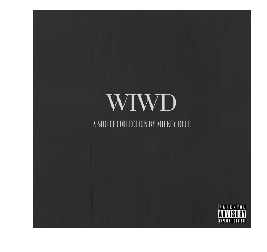

In [204]:
url = zouks.cover_art_url['Mickey Blue - Breathe']
file_name = '../data/cover_art.jpg'
urllib.request.urlretrieve(url, file_name)

img = plt.imread(file_name)
plt.imshow(img)
plt.axis('off');

In [205]:
url = zouks.preview_mp3['Mickey Blue - Breathe']
file_name = '../data/sample.mp3'
urllib.request.urlretrieve(url, file_name)

ipd.Audio(file_name)

## Feature Selection
Let's take a look at the audio features of the songs in my playlist and see if there are any interesting relationships.

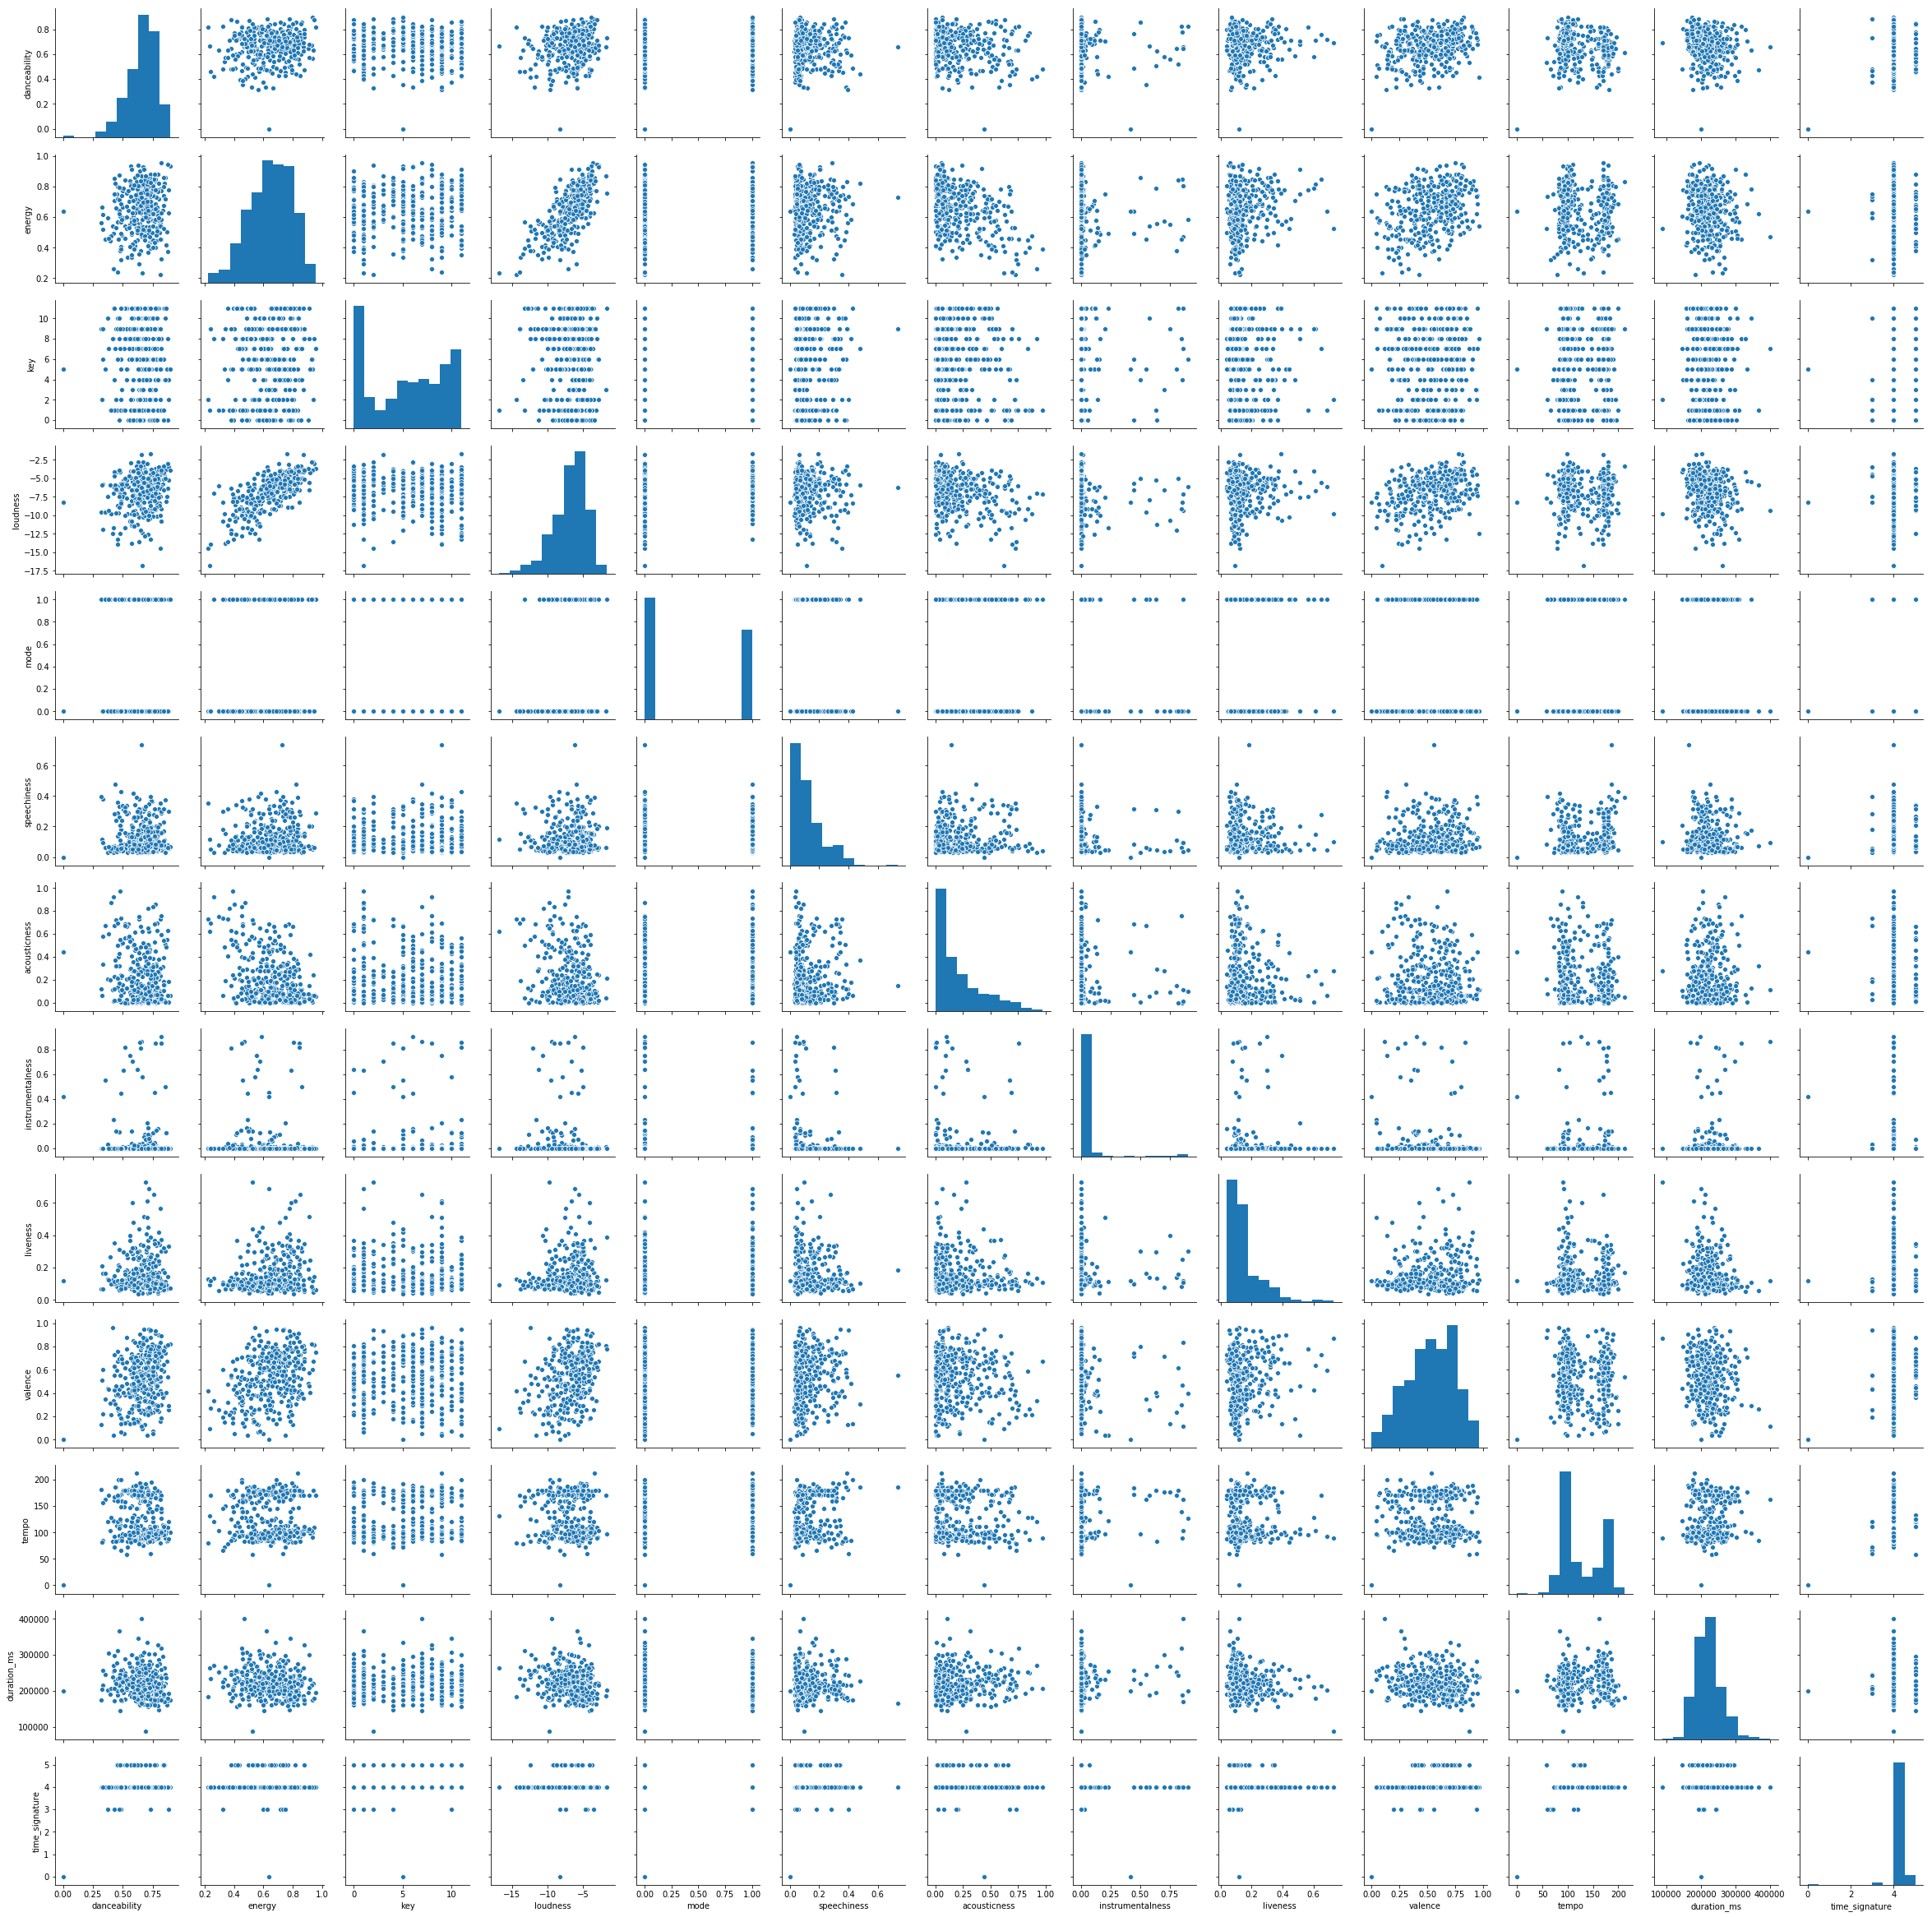

In [86]:
sns.pairplot(zouks[list(features[0].keys())])

## Missing Values
There are outliers that have the default of 0 for all of their audio features; we'll take these out of our data set.

## Scaled Values
We see two clusters in tempo ranges. Many song tempos can be read equivalently if they are doubled; so a song could be interpreted as having tempo 180 or 90 beats per minute. Zouk songs should ideally be between 70 and 90 bpm. We can get away with 65 to 95. Songs up to 105 bpm can be slowed 10% and still be playable. There may be songs at 120 bpm that sound zouky, but shouldn't be played in zouk sets (and songs from 110-130 really shouldn't be in this playlist). But anything at 130-200 is almost certainly a song I added because it's really 65-100 bpm.

So I'll halve the tempo for all songs with > 130 bpm.

## Redundant Features
**Key** is categorical, so we'll ignore it. **Mode** is probably relevant but from a music theory perspective, that moodiness of a minor key should be captured by **Valence**, so we'll drop that as well. And we'll drop **Loudness** because it's a component of **Energy**.

In [87]:
audio_feature_names = ['danceability', 'energy', 'speechiness', 'acousticness',
                       'instrumentalness', 'liveness', 'valence', 'tempo']

zouks_features = zouks[audio_feature_names]

zouks_features.index = zouks['artist'] + ' - ' + zouks['title']

In [88]:
zouks_features.loc[zouks_features.tempo >= 130, "tempo"] = zouks_features.loc[zouks_features.tempo >= 130, "tempo"]/2

/Users/cliffclive/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


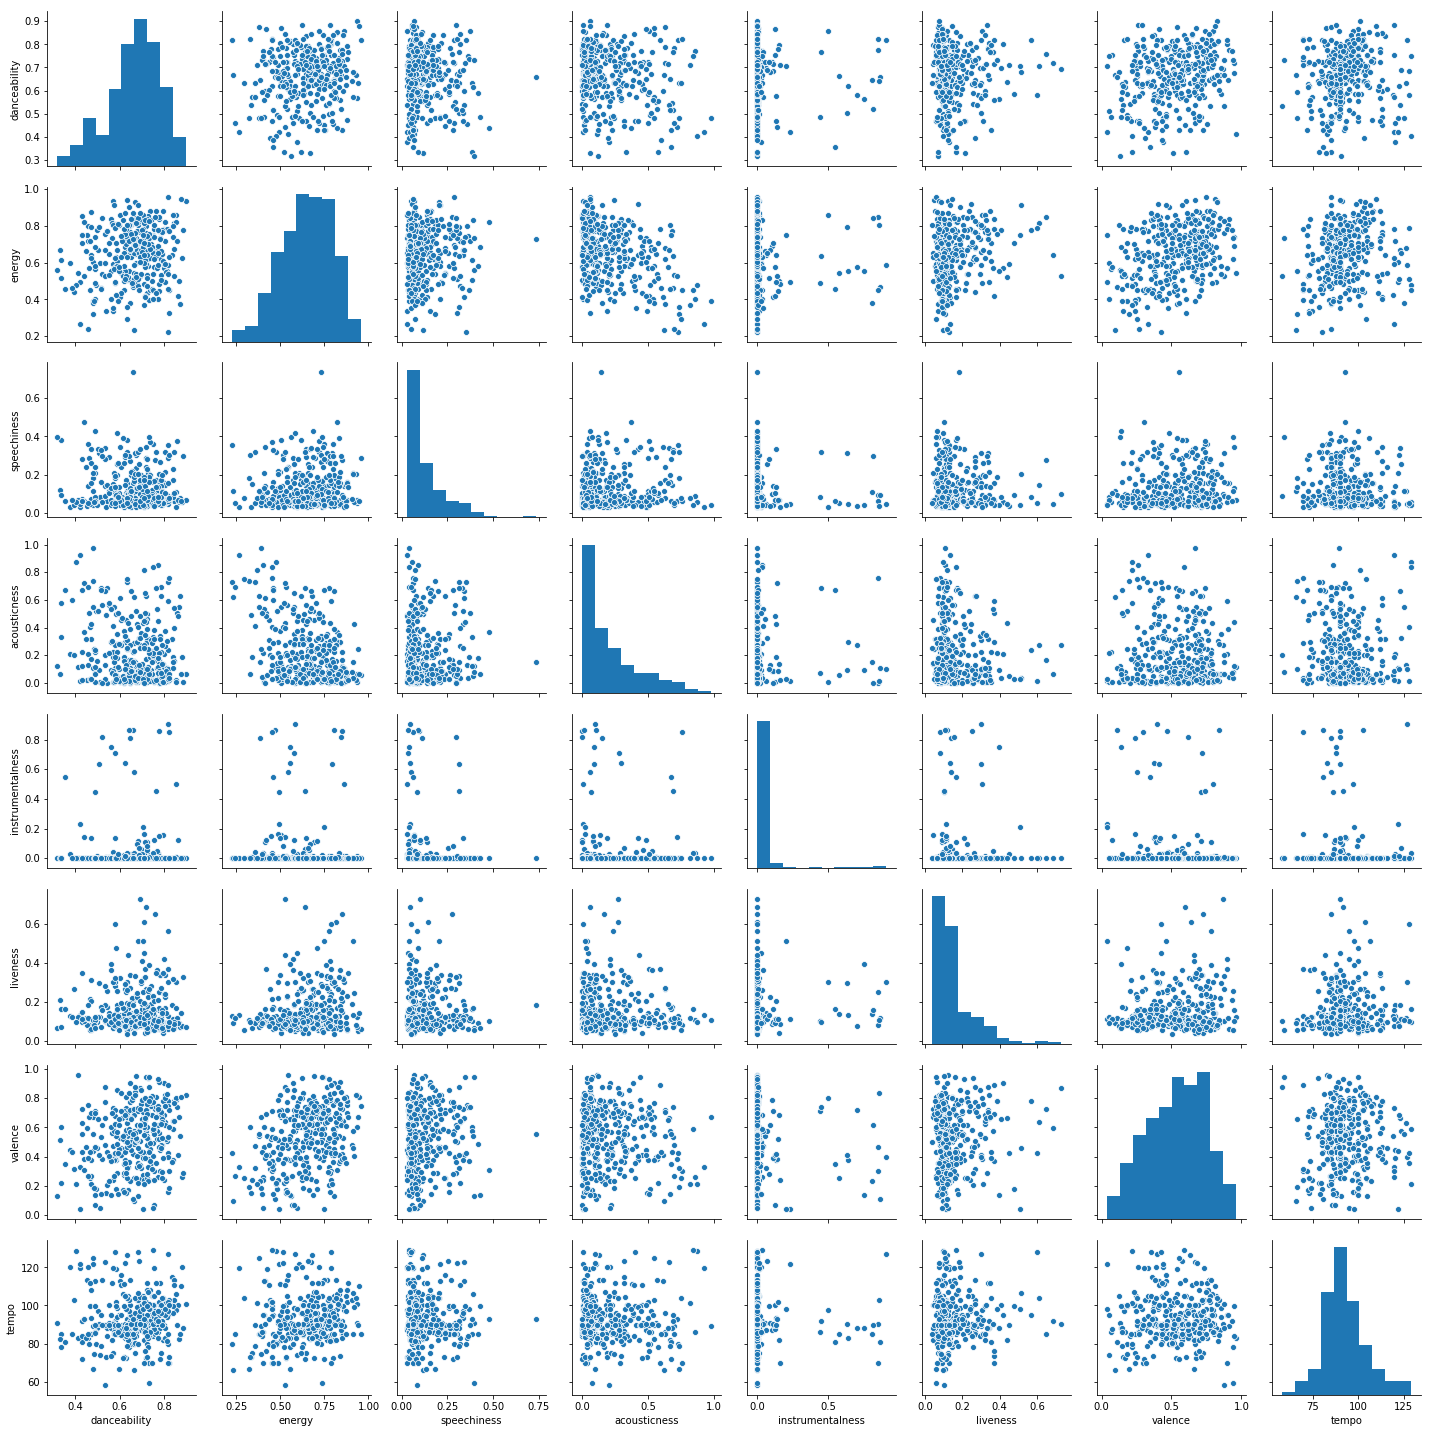

In [89]:
zouks_features = zouks_features.loc[zouks_features.tempo > 0, :]

sns.pairplot(zouks_features)

And just to make sure that our tempos are in the correct range:

(array([  2.,  10.,  19.,  75., 107.,  68.,  36.,  19.,  10.,  10.]),
 array([ 58.302,  65.385,  72.468,  79.551,  86.634,  93.717, 100.8  ,
        107.883, 114.966, 122.049, 129.132]),
 <a list of 10 Patch objects>)

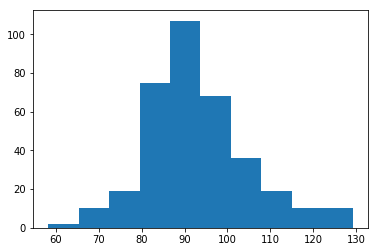

In [90]:
plt.hist(zouks_features.tempo)

Note to self: my Zoukables playlist is WAY TOO FAST.  
Hopefully I can remedy this with machine learning.

## Correlations
We've narrowed down our features to a set with fairly low correlation... they seem to be bounded within a (-0.25, 0.25) range. This should make things clearer for our clustering model.

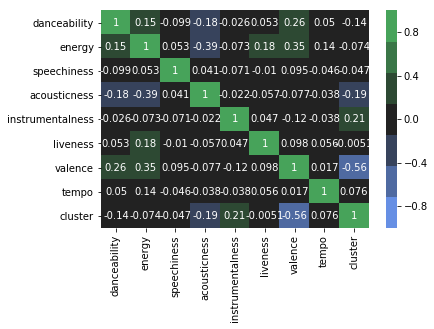

In [121]:
sns.heatmap(zouks_features.corr(), annot=True, vmin=-1, vmax=1,
            cmap=sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

## Clustering Songs with K-Means
We'll make 8 clusters of songs. I'm going to put the data in a separate matrix so that I can scale it without altering the original data.

/Users/cliffclive/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/cliffclive/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/cliffclive/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/cliffclive/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype

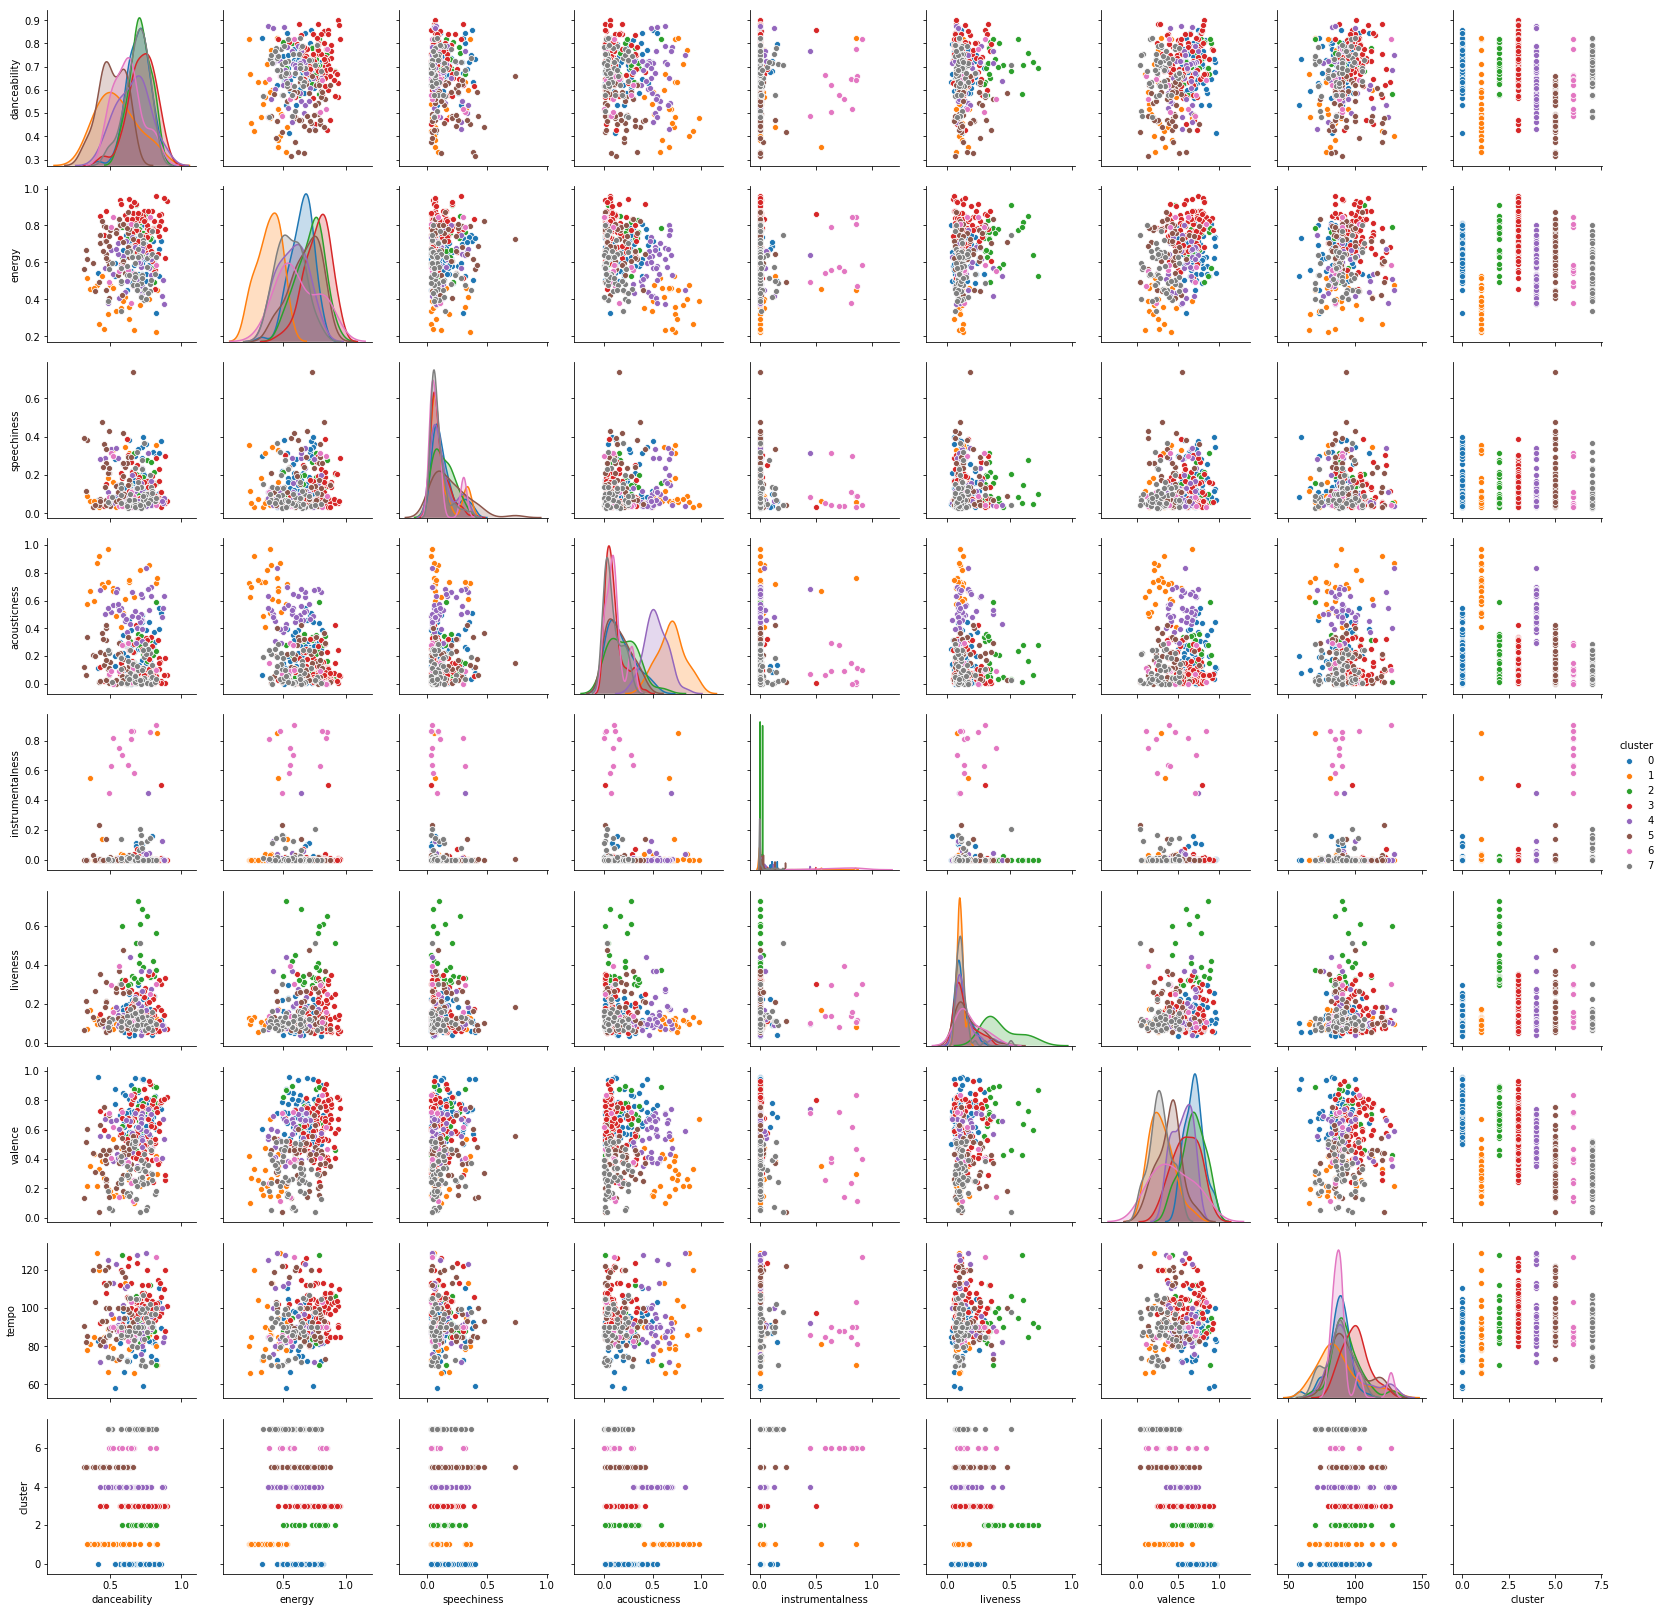

In [108]:
# Scale the data
scaler = MinMaxScaler()
X_data = scaler.fit_transform(zouks_features.values)

# Set parameters for our model
num_clusters = 8
tries = 10

# Build and train our model
km = KMeans(n_clusters=num_clusters,
            random_state=10,
            n_init=tries) # n_init, number of times the K-mean algorithm will run
km.fit(X_data)

# Apply labels and visualize data
zouks_features['cluster'] = km.labels_
sns.pairplot(zouks_features, hue = 'cluster')

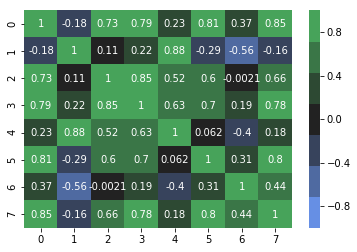

In [119]:
sns.heatmap(np.corrcoef(km.cluster_centers_), annot=True, vmin=-1, vmax=1,
            cmap=sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

Looks like we have 3 redundant clusters (5 and 7 are highly correlated with 0, and 4 is highly correlated with 1). So let's try again with 5 clusters.

/Users/cliffclive/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/cliffclive/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/cliffclive/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/cliffclive/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype

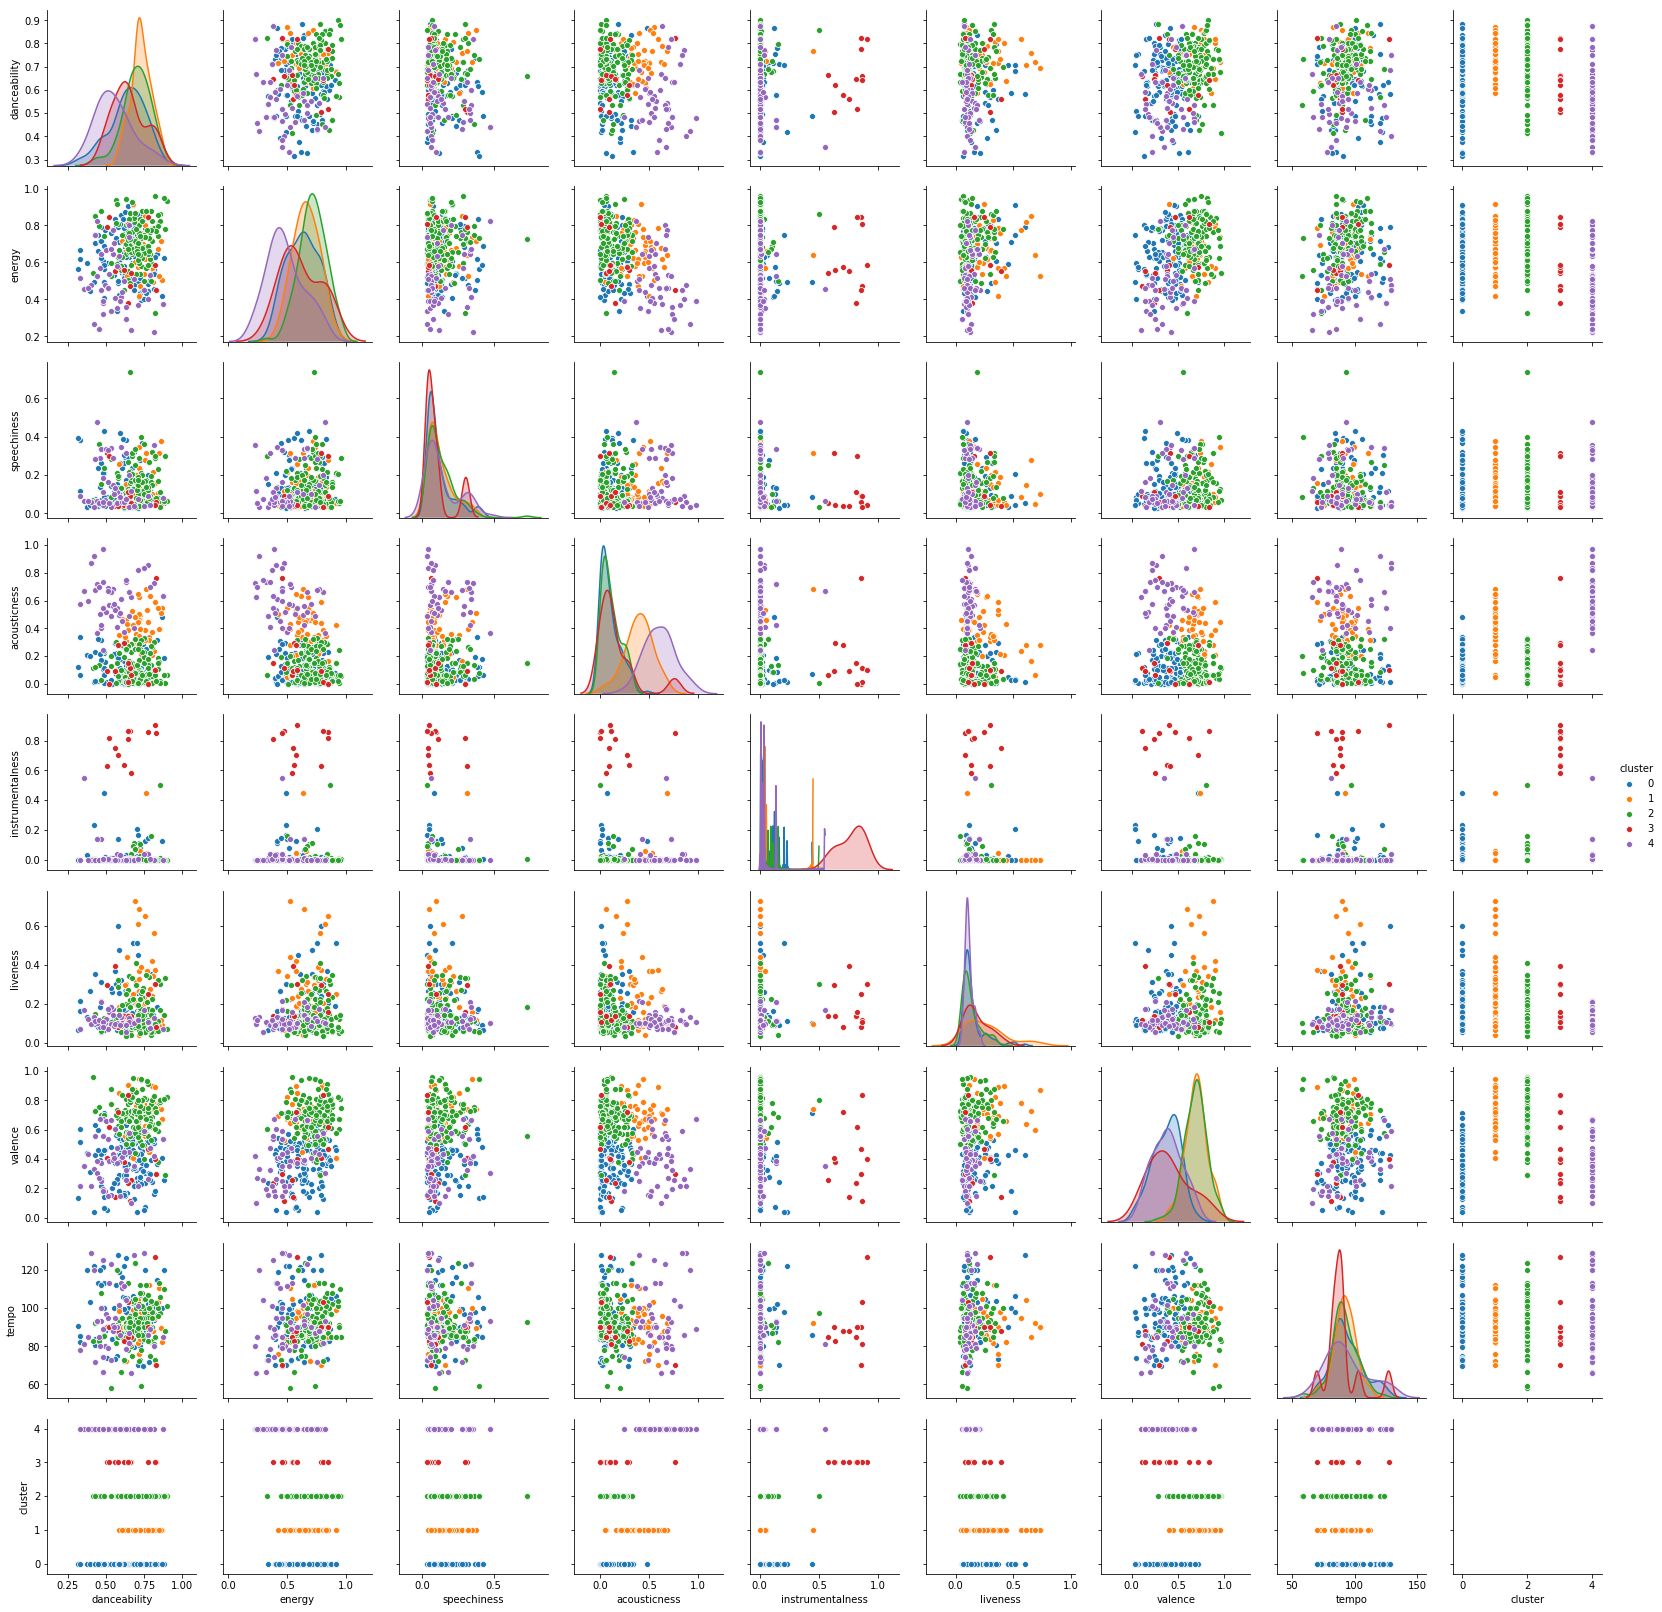

In [141]:
# Scale the data
scaler = MinMaxScaler()
X_data = scaler.fit_transform(zouks_features.values)

# Set parameters for our model
num_clusters = 5
tries = 10

# Build and train our model
km = KMeans(n_clusters=num_clusters,
            random_state=10,
            n_init=tries) # n_init, number of times the K-mean algorithm will run
km.fit(X_data)

# Apply labels and visualize data
zouks_features['cluster'] = km.labels_
sns.pairplot(zouks_features, hue = 'cluster')

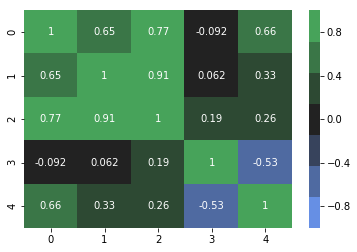

In [142]:
sns.heatmap(np.corrcoef(km.cluster_centers_), annot=True, vmin=-1, vmax=1,
            cmap=sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

Now cluster 2 is highly correlated with clusters 0 and 1. Let's try again with 4 clusters.

/Users/cliffclive/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/cliffclive/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/cliffclive/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/cliffclive/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype

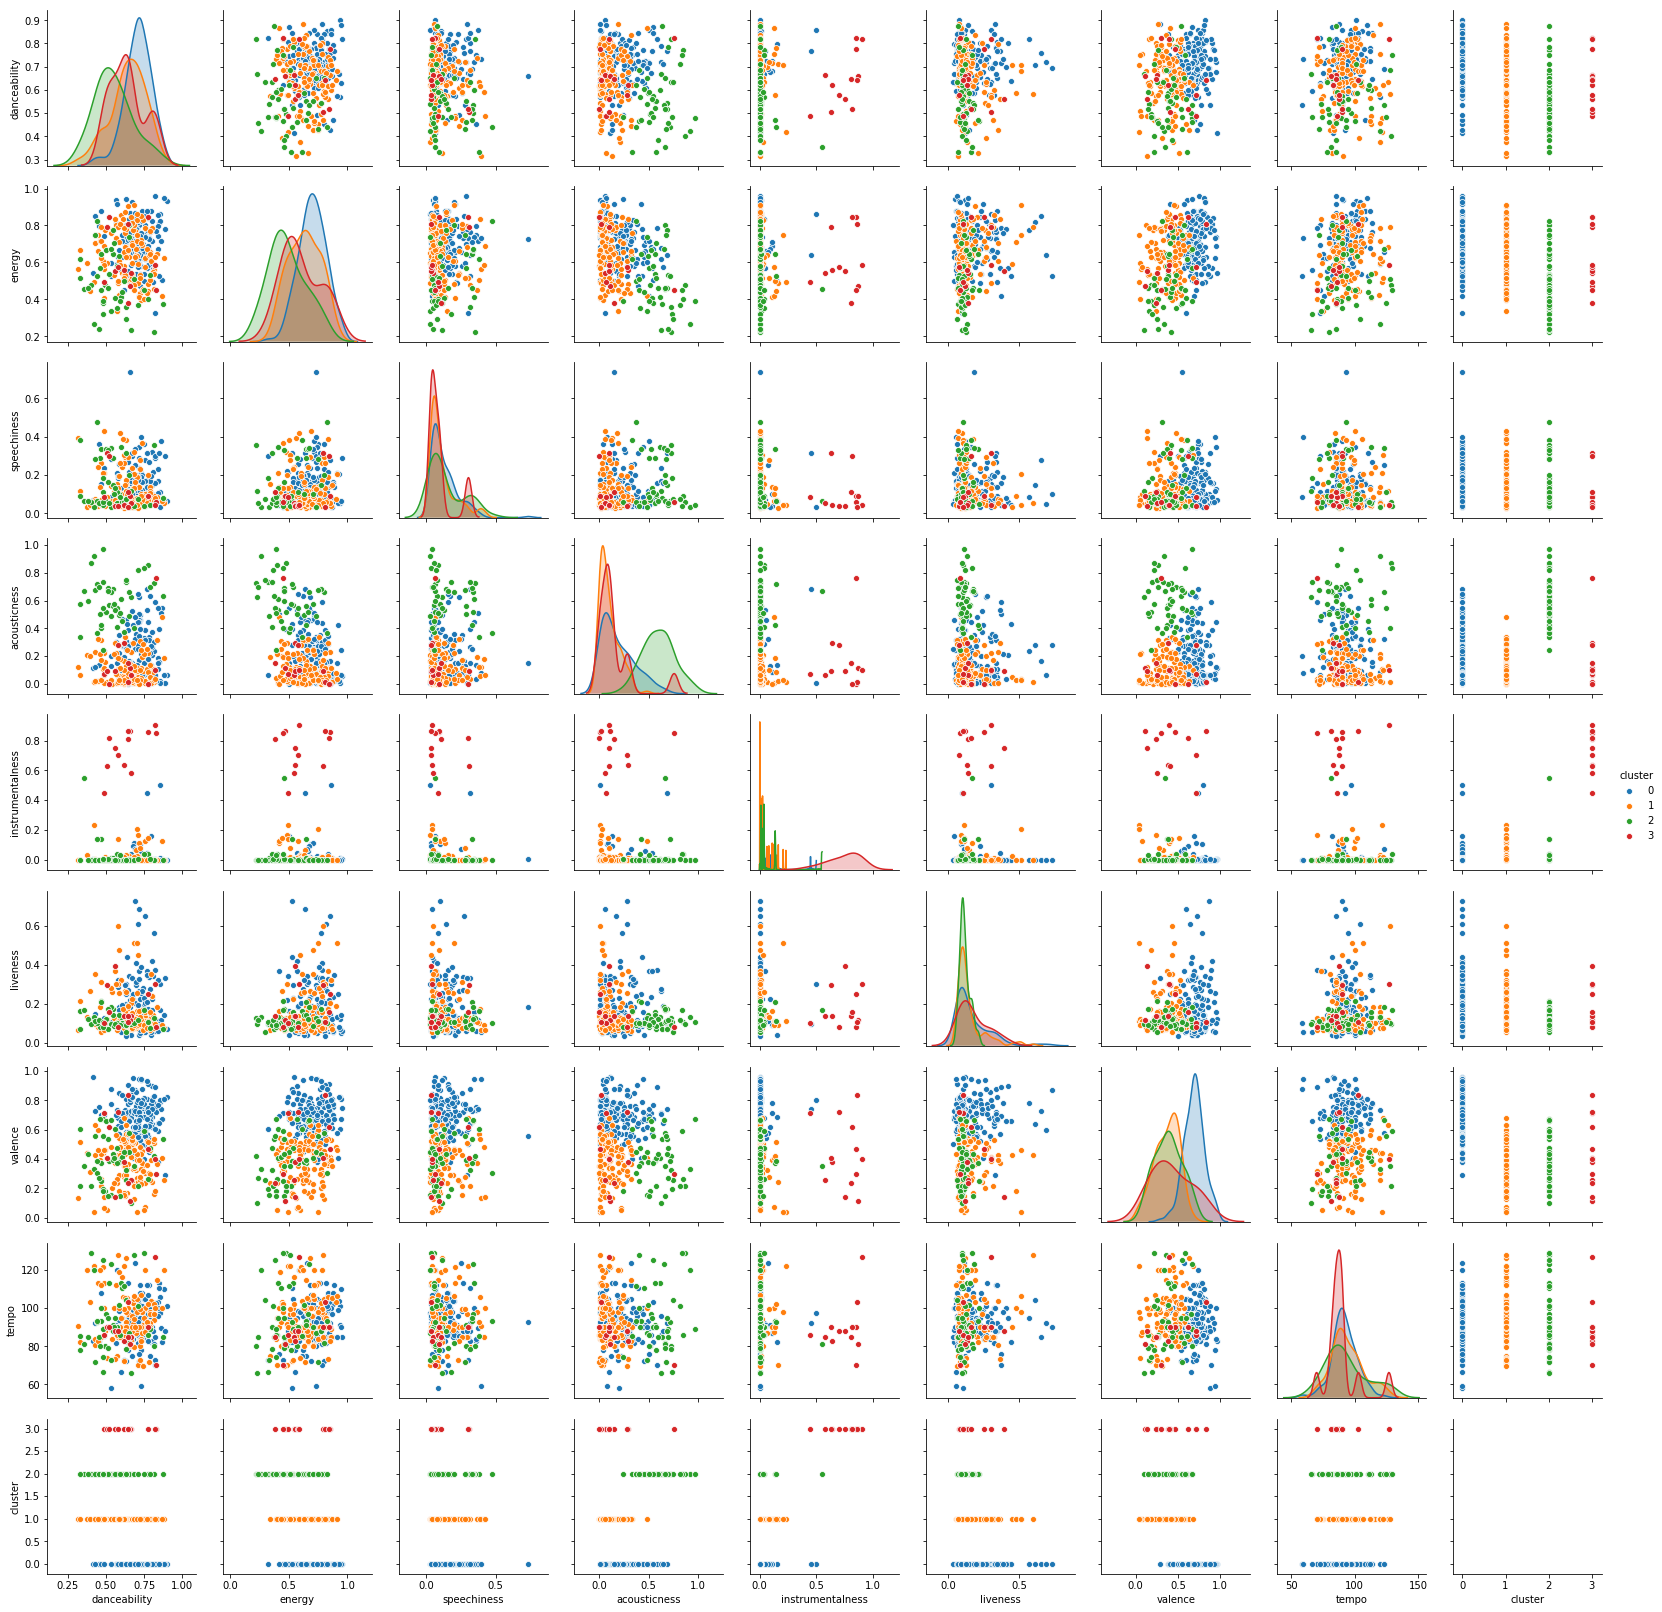

In [209]:
# Scale the data
scaler = MinMaxScaler()
X_data = scaler.fit_transform(zouks_features.values)

# Set parameters for our model
num_clusters = 4
tries = 10

# Build and train our model
km = KMeans(n_clusters=num_clusters,
            random_state=10,
            n_init=tries) # n_init, number of times the K-mean algorithm will run
km.fit(X_data)

# Apply labels and visualize data
zouks_features['cluster'] = km.labels_
sns.pairplot(zouks_features, hue = 'cluster')

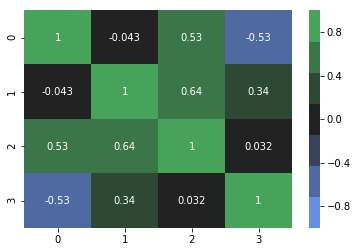

In [207]:
sns.heatmap(np.corrcoef(km.cluster_centers_), annot=True, vmin=-1, vmax=1,
            cmap=sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

This looks a bit more reasonable. But so far our approach has felt very intuitive; can we measure these differences more objectively?

## Choosing K to Minimize Intra-Cluster Variance

We can also choose our number of clusters in order to minimize the intra-cluster variance, also known as the silhouette score. 

(0, 0.26219620869484894)

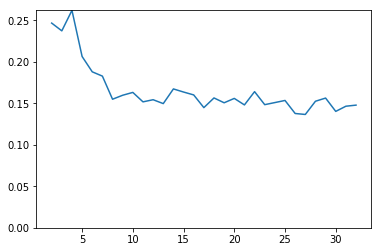

In [165]:
ks = list(range(2, 33))
scores = [0] * len(ks)
for k in range(len(ks)):
    km_k = KMeans(n_clusters=ks[k],
                random_state=10,
                n_init=tries) # n_init, number of times the K-mean algorithm will run
    km_k.fit(X_data)
    scores[k] = silhouette_score(X_data, km_k.labels_)

plt.plot(ks, scores)
plt.ylim(0, max(scores))

Our silhouette score peaks at 4 clusters.  
_TO DO: Elbow curve with Inertia score_

## Clustering with PCA and K-Means

Another approach to choosing the optimal number of clusters is to use a dimensionality reduction technique and plot our data along its principal components and see if a particular structure presents itself. 

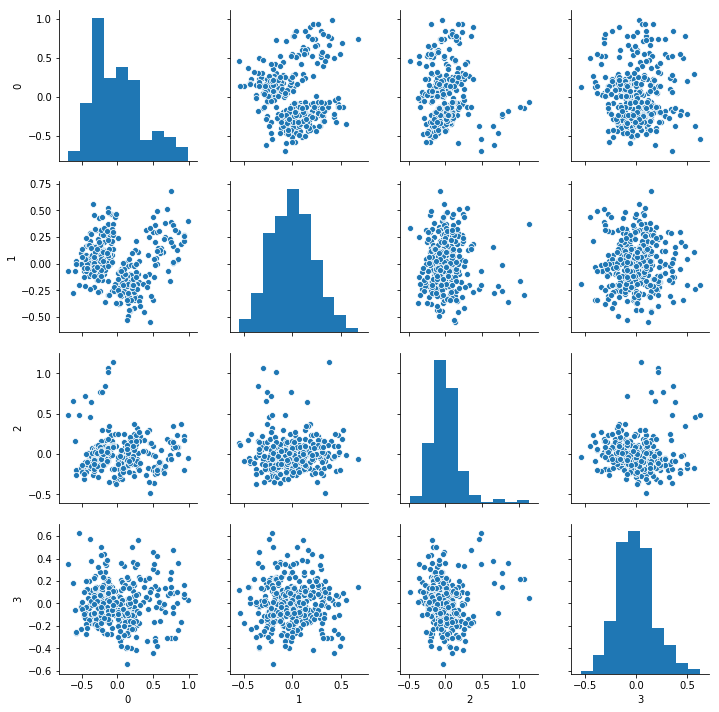

In [160]:
pca = PCA(n_components=4)
pca.fit(X_data)
X_pca = pca.transform(X_data)

#plt.scatter(X_pca[:,0], X_pca[:,1])
sns.pairplot(pd.DataFrame(X_pca))

## Three Candidates

In our (0, 1) plot, it looks like there could be two or three neatly separable clusters. Our (0, 2) looks separable into four clusters. Let's train K-means models on this reduced dimensionality data, and then examine the results in principal component space and in the original pairplots.

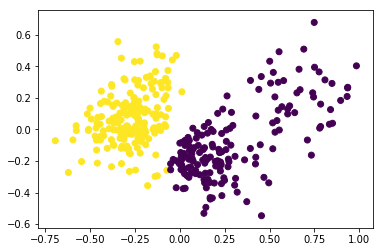

In [210]:
# Build and train our model
km_pca2 = KMeans(n_clusters=2, random_state=10, n_init=tries)
km_pca2.fit(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=km_pca2.labels_)

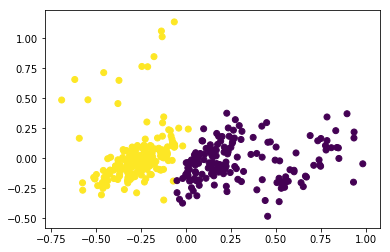

In [222]:
plt.scatter(X_pca[:,0], X_pca[:,2], c=km_pca2.labels_)

/Users/cliffclive/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/cliffclive/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/cliffclive/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/cliffclive/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype

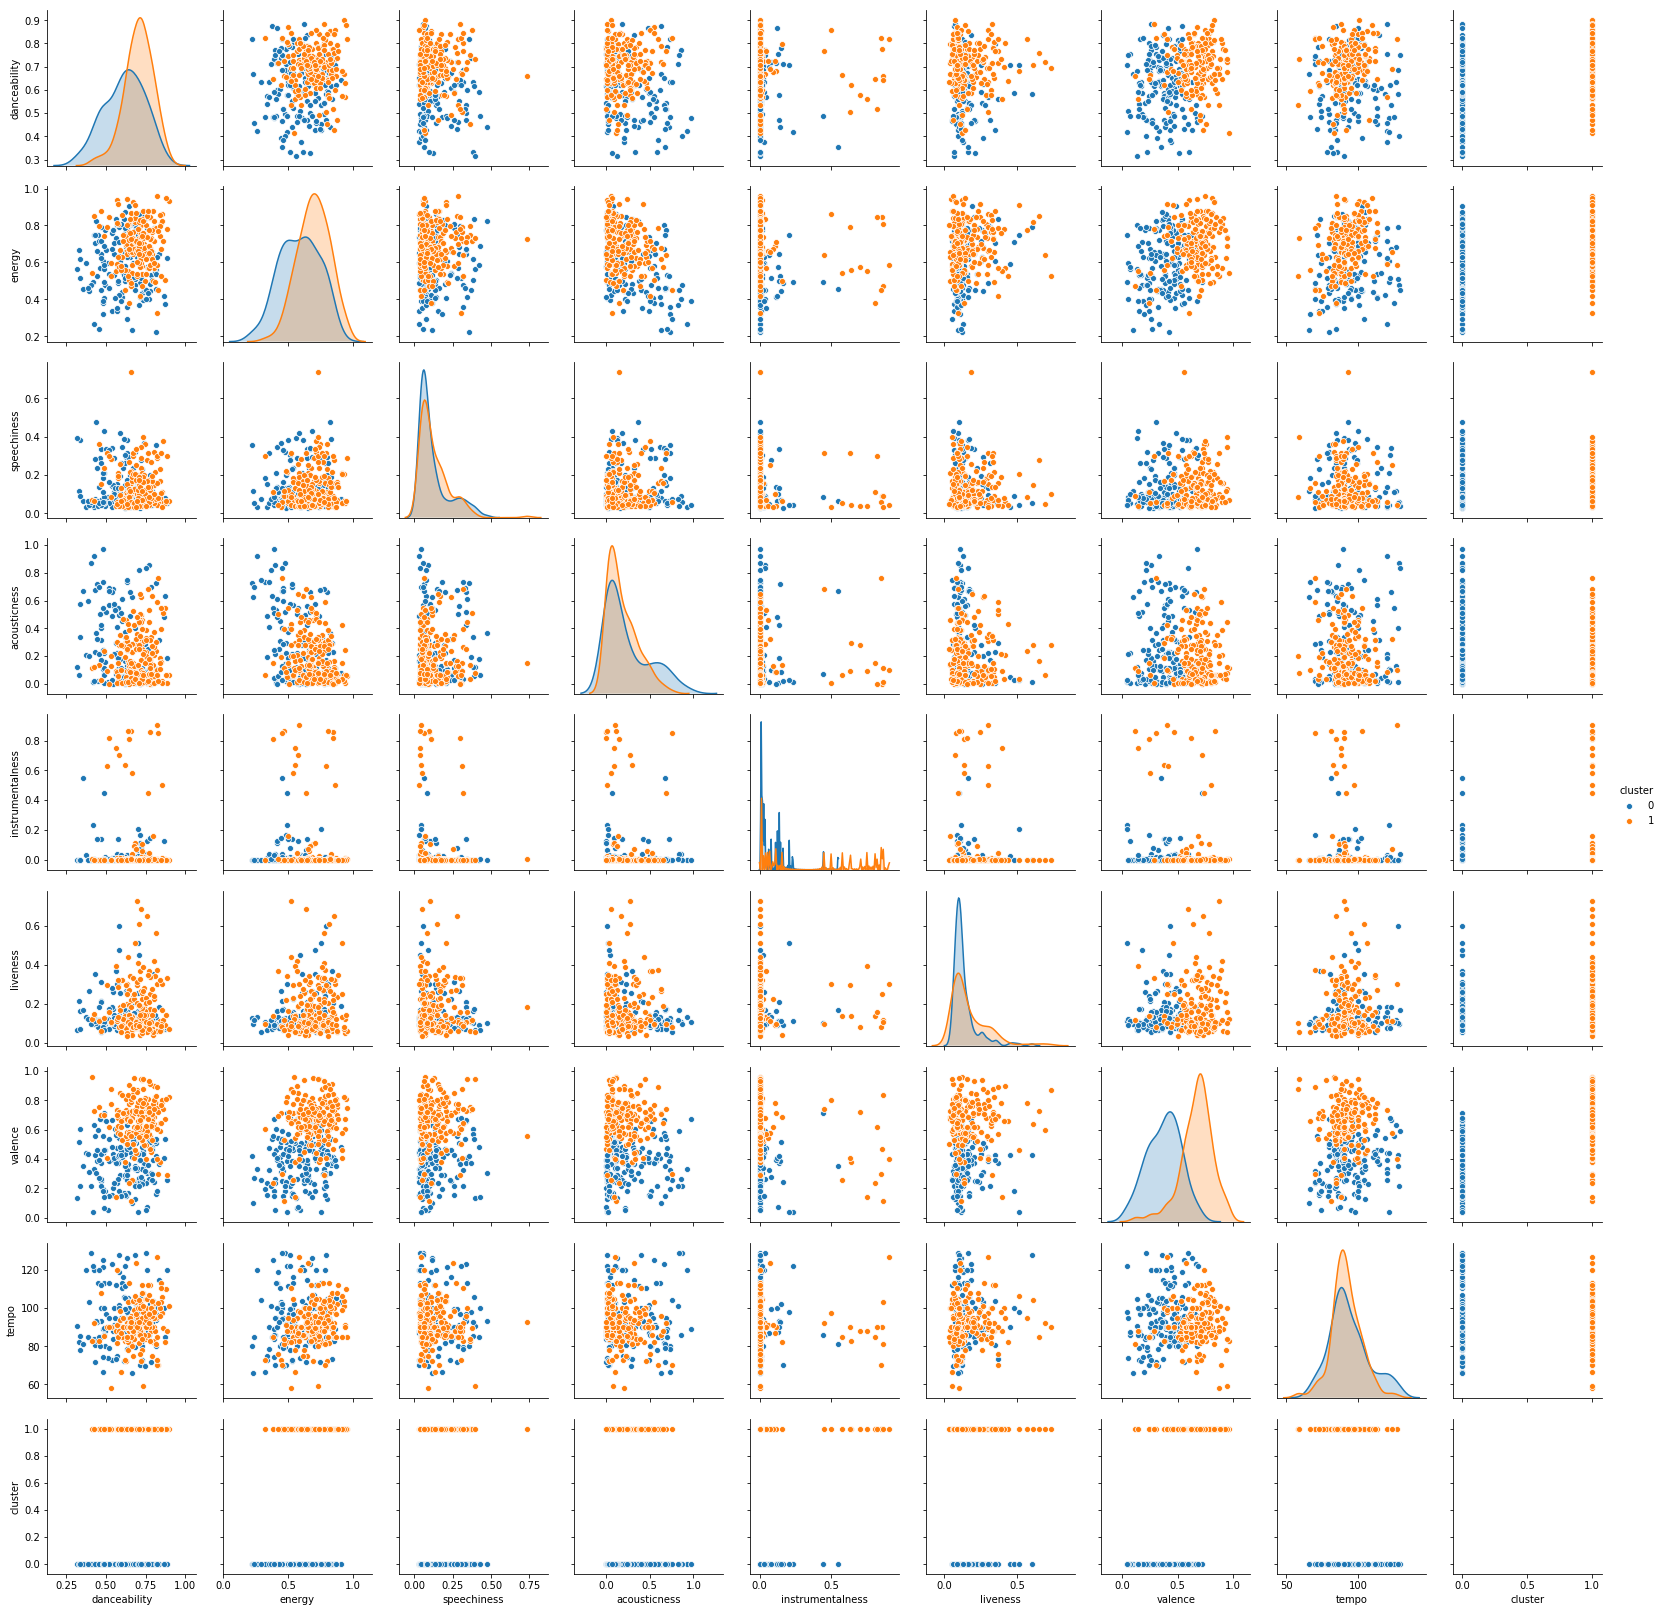

In [178]:
zouks_features['cluster'] = km_pca2.labels_
sns.pairplot(zouks_features, hue = 'cluster')

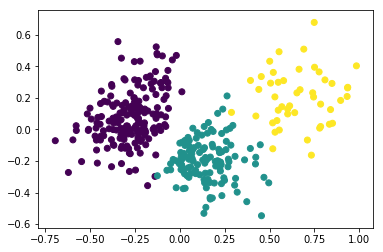

In [179]:
# Build and train our model
km_pca3 = KMeans(n_clusters=3, random_state=10, n_init=tries)
km_pca3.fit(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=km_pca3.labels_)

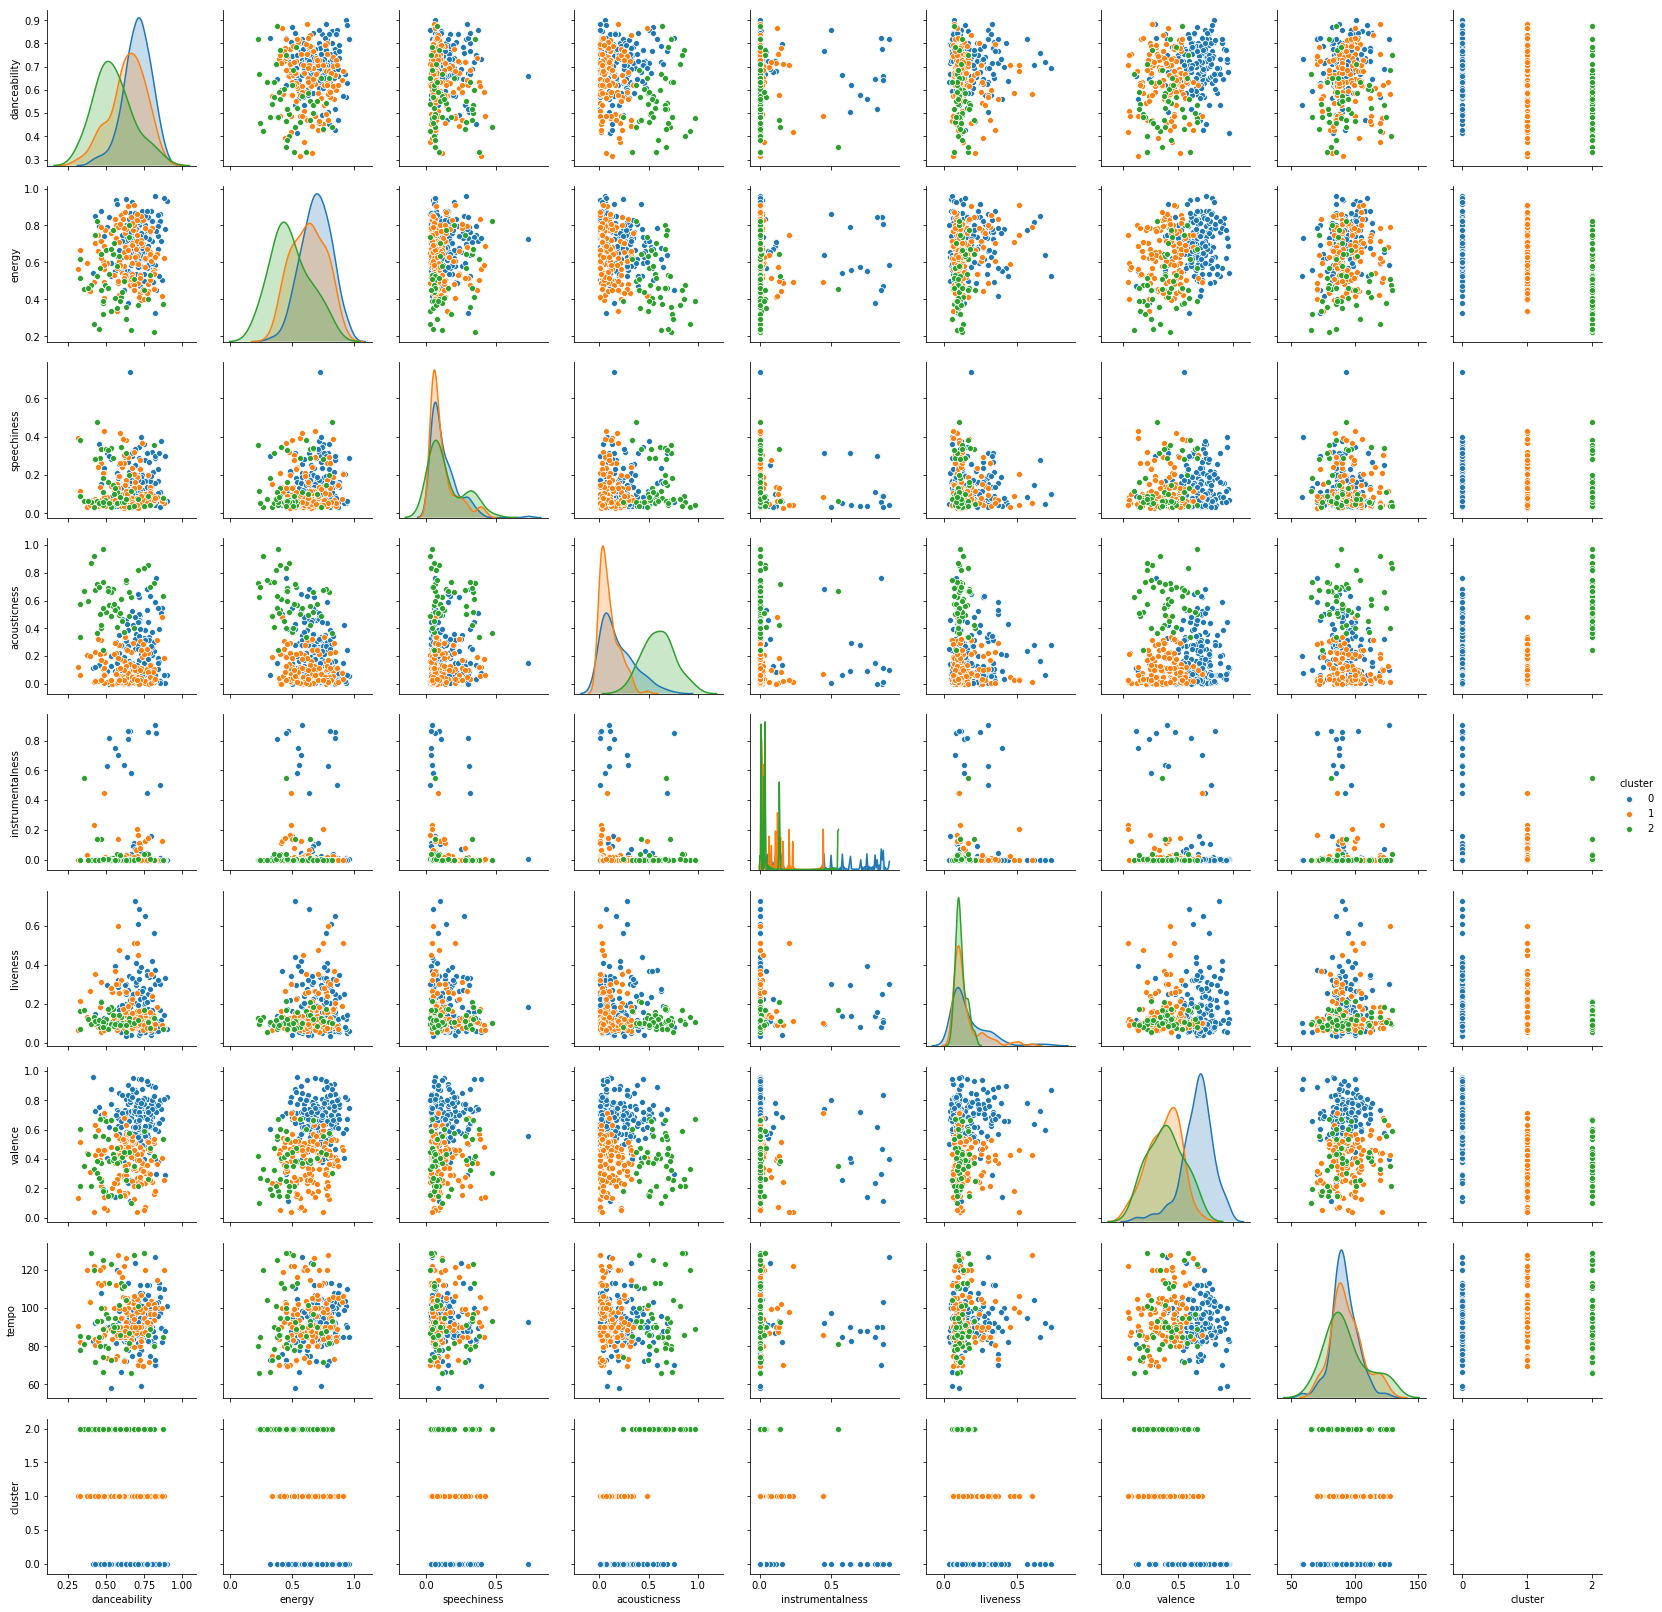

In [189]:
zouks_features['cluster'] = km_pca3.labels_
sns.pairplot(zouks_features, hue = 'cluster')

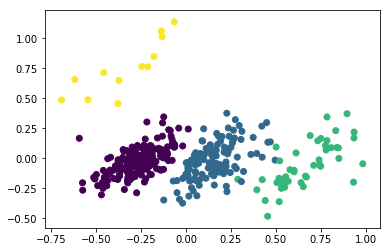

In [182]:
# Build and train our model
km_pca4 = KMeans(n_clusters=4, random_state=10, n_init=tries)
km_pca4.fit(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,2], c=km_pca4.labels_)

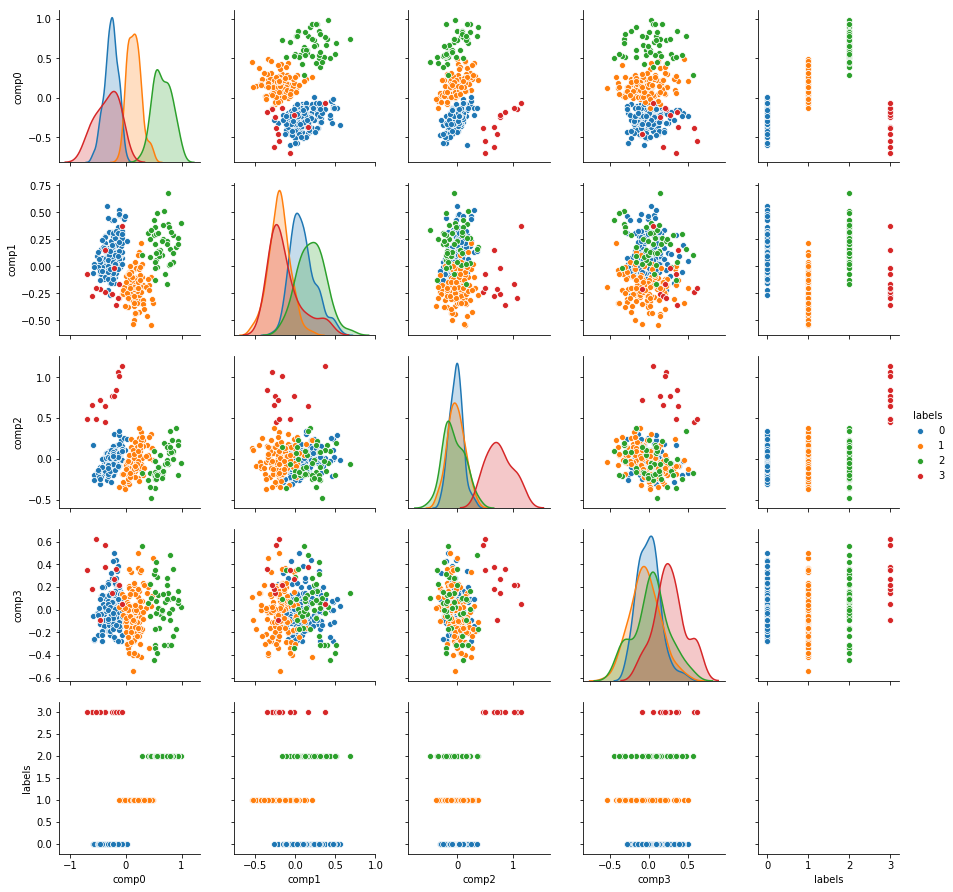

In [198]:
comps = ['comp0', 'comp1', 'comp2', 'comp3']
X_plot=pd.DataFrame(X_pca, columns=comps)
X_plot['labels'] = km_pca4.labels_
sns.pairplot(X_plot, hue='labels')

Notice that we see a clear separation of clusters in our PCA pairplots. Also, in our distributions of clusters in component 0, we see three distinct distributions for clusters 0, 1, and 2, with an overlap of clusters 0 and 3. Then cluster 3 pulls away from the other distributions in component 2.

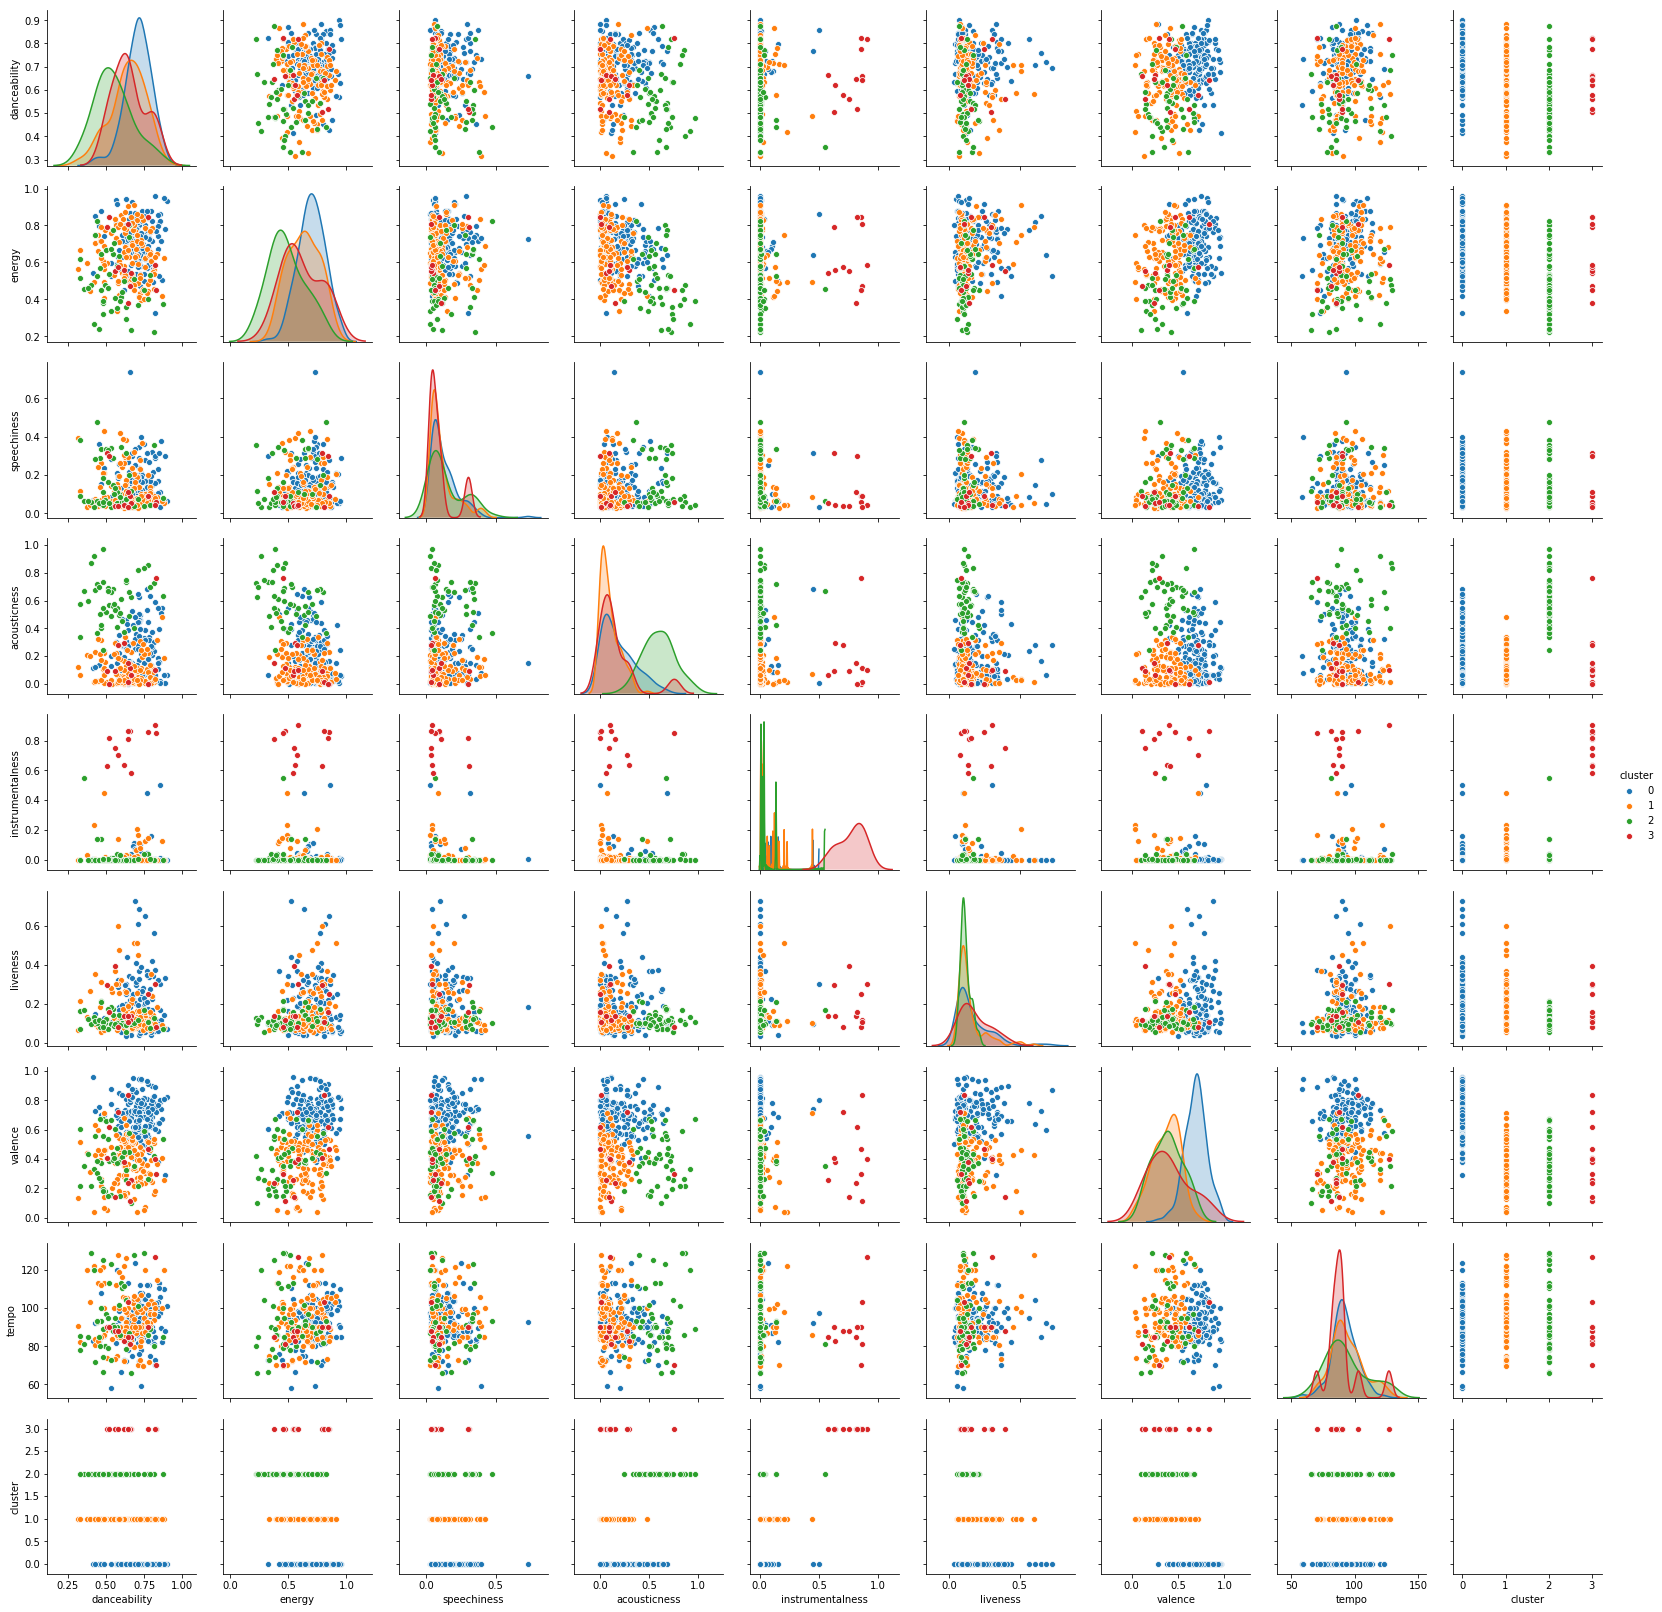

In [188]:
zouks_features['cluster'] = km_pca4.labels_
sns.pairplot(zouks_features, hue = 'cluster')

In the original feature space, the clusters are not as clearly separable in the pair plots. However, we do see cluster 0 pulling away from the other distributions in the Valence space, cluster 2 pulling away from the others in the Acousticness space, and cluster 3 pulling away in the Instrumentalness space. Cluster 1 doesn't have a particularly distinct distribution in any of these feature spaces, but it doesn't need to -- we already have clear signals for the other three. And we can't rule out the possibility that there are unexplored features that may pull cluster 1 away from the others.

## Next steps

For the next stage of my project, I plan to partition my playlist into these four clusters and use the Spotify API to create individual playlists that break up the original one on my account.

In [219]:
zouks_features[zouks_features.cluster==0].describe()

danceability      energy  speechiness  acousticness  instrumentalness  \
count    173.000000  173.000000   173.000000    173.000000        173.000000   
mean       0.710890    0.702202     0.132516      0.192618          0.010556   
std        0.087454    0.116219     0.097578      0.166086          0.054161   
min        0.414000    0.326000     0.031500      0.001570          0.000000   
25%        0.660000    0.627000     0.063300      0.059900          0.000000   
50%        0.719000    0.702000     0.101000      0.148000          0.000018   
75%        0.774000    0.779000     0.172000      0.299000          0.001150   
max        0.899000    0.957000     0.734000      0.686000          0.500000   

         liveness     valence       tempo  cluster  
count  173.000000  173.000000  173.000000    173.0  
mean     0.169541    0.692497   92.048711      0.0  
std      0.126032    0.118732   10.109045      0.0  
min      0.036400    0.288000   58.302000      0.0  
25%      0.088800    0.616000   86.018000      0.0  
50%      0.120000    0.698000   91.022000      0.0  
75%      0.224000    0.766000   98.026000      0.0  
max      0.730000    0.962000  123.462000      0.0

In [218]:
zouks_features[zouks_features.cluster==1].describe()  # Mario

danceability      energy  speechiness  acousticness  instrumentalness  \
count    123.000000  123.000000   123.000000    123.000000        123.000000   
mean       0.644919    0.635244     0.117000      0.101153          0.014279   
std        0.116546    0.135218     0.094335      0.096801          0.040474   
min        0.317000    0.338000     0.030000      0.000989          0.000000   
25%        0.582000    0.529500     0.052850      0.024250          0.000002   
50%        0.660000    0.641000     0.075100      0.065800          0.000108   
75%        0.728000    0.750500     0.140000      0.151000          0.002835   
max        0.882000    0.912000     0.427000      0.483000          0.231000   

         liveness     valence       tempo  cluster  
count  123.000000  123.000000  123.000000    123.0  
mean     0.150335    0.369440   94.341411      1.0  
std      0.101962    0.143459   12.839022      0.0  
min      0.055900    0.039700   69.928000      1.0  
25%      0.091250    0.262000   85.972500      1.0  
50%      0.113000    0.391000   91.017000      1.0  
75%      0.164000    0.480500  101.109000      1.0  
max      0.600000    0.682000  128.020000      1.0

In [217]:
zouks_features[zouks_features.cluster==2].describe()  # high acousticness

danceability     energy  speechiness  acousticness  instrumentalness  \
count     47.000000  47.000000    47.000000     47.000000         47.000000   
mean       0.551723   0.489745     0.146464      0.603851          0.021408   
std        0.125162   0.155105     0.122385      0.160492          0.083977   
min        0.334000   0.225000     0.031900      0.244000          0.000000   
25%        0.468000   0.385000     0.057150      0.499500          0.000000   
50%        0.537000   0.460000     0.090200      0.600000          0.000015   
75%        0.626500   0.598500     0.240500      0.696500          0.002200   
max        0.874000   0.822000     0.476000      0.976000          0.550000   

        liveness    valence       tempo  cluster  
count  47.000000  47.000000   47.000000     47.0  
mean    0.117264   0.389657   93.459404      2.0  
std     0.035988   0.158846   16.653753      0.0  
min     0.057800   0.095900   65.810000      2.0  
25%     0.095050   0.258500   81.450000      2.0  
50%     0.107000   0.384000   89.941000      2.0  
75%     0.133000   0.505500  101.380500      2.0  
max     0.213000   0.672000  129.132000      2.0

In [216]:
zouks_features[zouks_features.cluster==3].describe()  # high instrumentalness

danceability     energy  speechiness  acousticness  instrumentalness  \
count     13.000000  13.000000    13.000000     13.000000         13.000000   
mean       0.639231   0.607462     0.100300      0.155751          0.748308   
std        0.112808   0.159526     0.094361      0.203278          0.138776   
min        0.487000   0.382000     0.035300      0.000699          0.446000   
25%        0.562000   0.491000     0.044300      0.059500          0.639000   
50%        0.642000   0.557000     0.061800      0.094700          0.810000   
75%        0.665000   0.791000     0.092900      0.152000          0.855000   
max        0.825000   0.847000     0.312000      0.760000          0.908000   

        liveness    valence       tempo  cluster  
count  13.000000  13.000000   13.000000     13.0  
mean    0.176731   0.429462   89.689731      3.0  
std     0.100596   0.231489   13.364151      0.0  
min     0.078600   0.113000   69.991000      3.0  
25%     0.106000   0.253000   84.981500      3.0  
50%     0.137000   0.399000   87.982500      3.0  
75%     0.249000   0.620000   90.017500      3.0  
max     0.396000   0.838000  127.017000      3.0

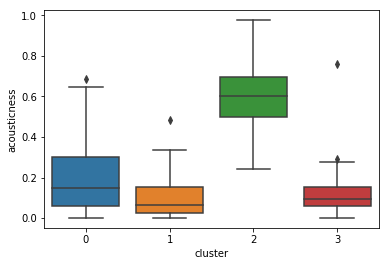

In [231]:
sns.boxplot(x="cluster", y="acousticness", data=zouks_features)

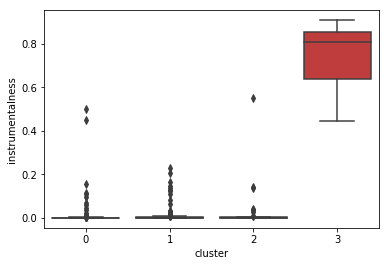

In [232]:
sns.boxplot(x="cluster", y="instrumentalness", data=zouks_features)

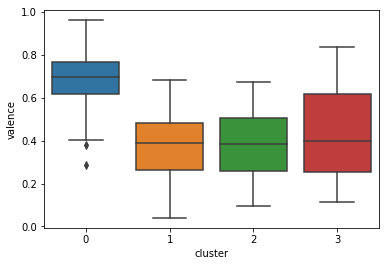

In [234]:
sns.boxplot(x="cluster", y="valence", data=zouks_features)